<a href="https://colab.research.google.com/github/JayP127/Climate_change_portfolio/blob/main/SensitivityPortfolioOptimizationScipy20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensitivity analysis of variable CER_j on the allocation weights of the Portfolio

In [ ]:
pip install seaborn

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Table with 20% increase in CER_j
From the results table below, we can see that 20% increases in the CER_j values of companies only one company gets affected, Giant, increases of 20% increases in the CER_j values in the other companies don't affect the resulting weights after optimization

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Given data and functions
company_cerj = {
    "1. Oatly": 52,
    "2. Beyond Meat": 54,
    "3. First Solar": 15,
    "4. Vestas": 6,
    "5. Tesla": 544,
    "6. Giant": 44,
    "7. Goldwind": 1.63,
    "8. Nordex": 1.54,
    "9. Jinkosolar": 2.43,
    "10. Trina S.": 0.80,
    "11. Longi": 1.65,
    "12. CA Solar": 0.47,
    "13. Nio": 171,
    "14. Rivian": 456,
    "15. Lucid": 1697,
    "16. Xpeng": 154,
    "17. Ormat": 184,
    "18. Kingspan": 84,
    "19. BlueEarth": 87,
    "20. Orsted": 248
}

companies = list(company_cerj.keys())
cerj_values = list(company_cerj.values())

def objective_with_cerj(w, cerj_values):
    return 1.0 / sum([w[i] / cerj_values[i] for i in range(len(w))])

def constraint(w):
    return sum(w) - 1.0

# Create DataFrame to store results
columns = ['company', 'cerj_value'] + [f'weights_company_{i+1}' for i in range(len(companies))]
df_results = pd.DataFrame(columns=columns)

# Perform original optimization
w0 = np.array([0.05] * len(companies))
bounds = [(0.01, 0.10) for _ in range(len(companies))]
constraints = {'type': 'eq', 'fun': constraint}

result = minimize(objective_with_cerj, w0, args=(cerj_values,), method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimized_weights = result.x
else:
    optimized_weights = [np.nan] * len(companies)

data = {'company': 'Original', 'cerj_value': 'Original'}
data.update({f'weights_company_{j+1}': optimized_weights[j] for j in range(len(companies))})

df_results = pd.concat([df_results, pd.DataFrame([data])], ignore_index=True)

# Perform sensitivity analysis for increased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 1.2  # Increase by 20%

    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimized_weights = result.x
    else:
        optimized_weights = [np.nan] * len(companies)

    data = {'company': companies[i], 'cerj_value': cerj_values_temp[i]}
    data.update({f'weights_company_{j+1}': optimized_weights[j] for j in range(len(companies))})

    df_results = pd.concat([df_results, pd.DataFrame([data])], ignore_index=True)

df_results


,company,cerj_value,weights_company_1,weights_company_2,weights_company_3,weights_company_4,weights_company_5,weights_company_6,weights_company_7,weights_company_8,weights_company_9,weights_company_10,weights_company_11,weights_company_12,weights_company_13,weights_company_14,weights_company_15,weights_company_16,weights_company_17,weights_company_18,weights_company_19,weights_company_20
0,Original,Original,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,1. Oatly,62.4,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,2. Beyond Meat,64.8,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,3. First Solar,18.0,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,4. Vestas,7.2,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
5,5. Tesla,652.8,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,6. Giant,52.8,0.060487,0.01,0.1,0.1,0.01,0.039513,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
7,7. Goldwind,1.956,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
8,8. Nordex,1.848,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,9. Jinkosolar,2.916,0.010000,0.01,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


# Plot with 20% increase in CER_j
From the results table below, we can see that 20% increases in the CER_j values of companies only one company gets affected, Giant, increases of 20% increases in the CER_j values in the other companies don't affect the resulting weights after optimization

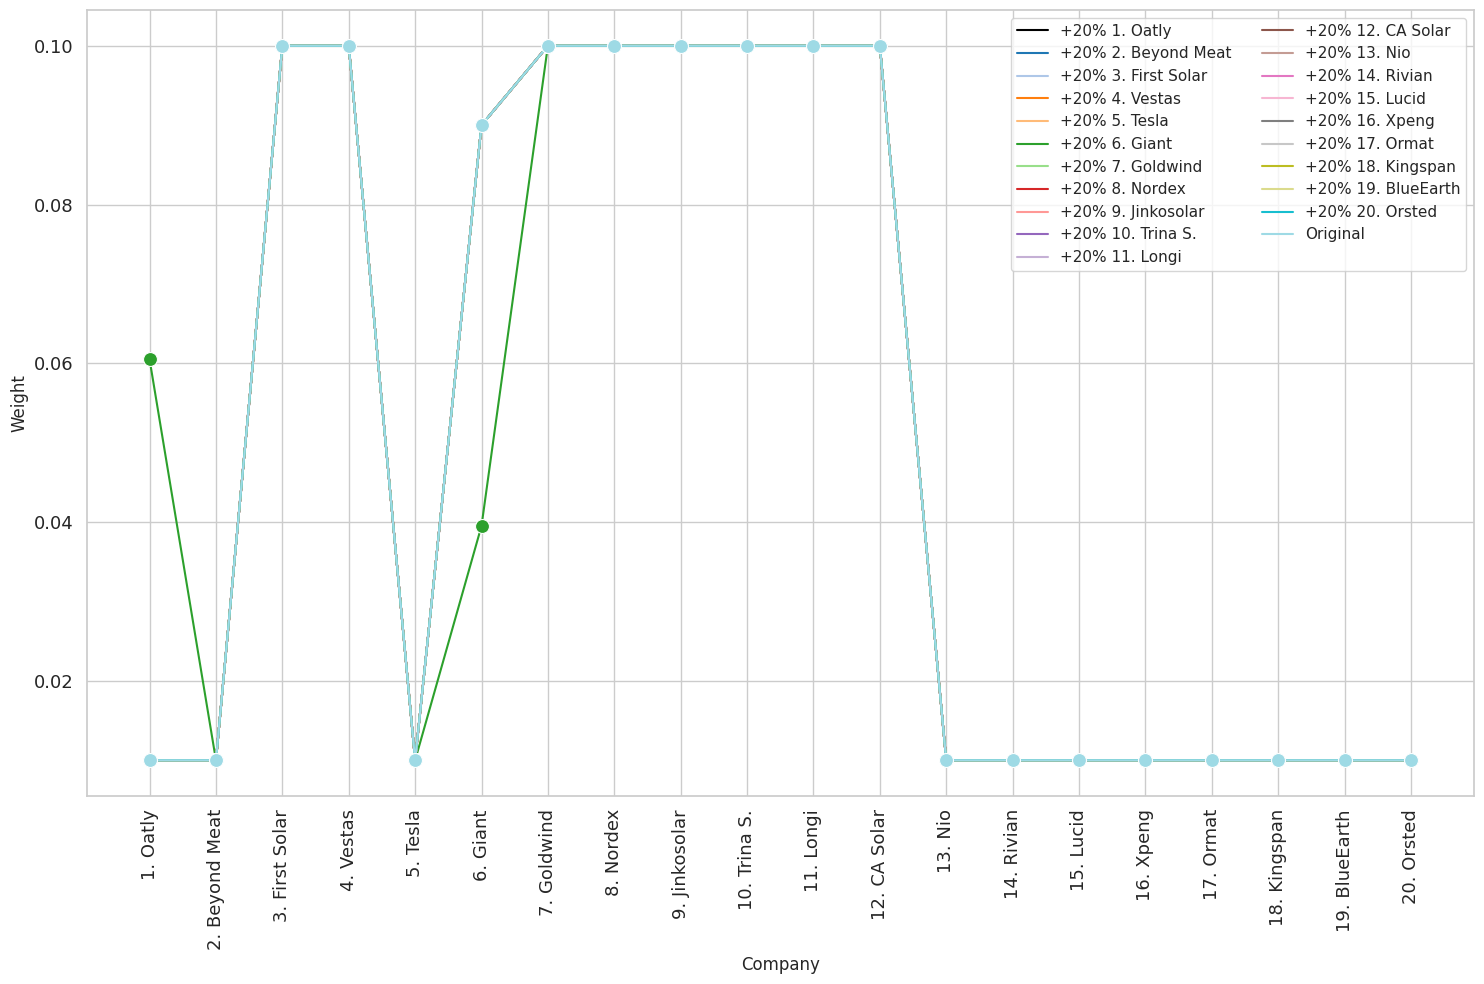

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given data and functions
company_cerj = {
    "1. Oatly": 52,
    "2. Beyond Meat": 54,
    "3. First Solar": 15,
    "4. Vestas": 6,
    "5. Tesla": 544,
    "6. Giant": 44,
    "7. Goldwind": 1.63,
    "8. Nordex": 1.54,
    "9. Jinkosolar": 2.43,
    "10. Trina S.": 0.80,
    "11. Longi": 1.65,
    "12. CA Solar": 0.47,
    "13. Nio": 171,
    "14. Rivian": 456,
    "15. Lucid": 1697,
    "16. Xpeng": 154,
    "17. Ormat": 184,
    "18. Kingspan": 84,
    "19. BlueEarth": 87,
    "20. Orsted": 248
}

companies = list(company_cerj.keys())
cerj_values = list(company_cerj.values())

def objective_with_cerj(w, cerj_values):
    return 1.0 / sum([w[i] / cerj_values[i] for i in range(len(w))])

def constraint(w):
    return sum(w) - 1.0

# Perform original optimization
w0 = np.array([0.05] * len(companies))
bounds = [(0.01, 0.10) for _ in range(len(companies))]
constraints = {'type': 'eq', 'fun': constraint}
result = minimize(objective_with_cerj, w0, args=(cerj_values,), method='SLSQP', bounds=bounds, constraints=constraints)
original_optimized_weights = result.x if result.success else None

# Initialize DataFrame for corrected sensitivity analysis
df_increase = pd.DataFrame(columns=['Company', 'Scenario', 'Weight'])

# Perform corrected sensitivity analysis for increased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 1.2
    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        temp_df = pd.DataFrame({
            'Company': companies,
            'Scenario': f'+20% {companies[i]}',
            'Weight': result.x
        })
        df_increase = pd.concat([df_increase, temp_df])

# Add the original weights to the dataframe
if original_optimized_weights is not None:
    temp_df = pd.DataFrame({
        'Company': companies,
        'Scenario': 'Original',
        'Weight': original_optimized_weights
    })
    df_increase = pd.concat([df_increase, temp_df])

# Plot using Seaborn for +20% CERj Variations
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
palette = sns.color_palette("tab20", len(df_increase['Scenario'].unique()) - 1)
palette = ['black'] + palette  # Add black for the 'Original' scenario
sns.lineplot(x='Company', y='Weight', hue='Scenario', data=df_increase,
             palette=palette, marker='o', markersize=10)
plt.title('')
plt.xticks(rotation=90, fontsize=plt.rcParams['xtick.labelsize'] + 2)  # Updated line
plt.yticks(fontsize=plt.rcParams['ytick.labelsize'] + 2)  # New line
plt.legend(ncol=2, loc='upper right')
plt.tight_layout()
plt.show()



# Table with 20% decrease in CER_j
From the results table below, we can see that 20% increases in the CER_j values of companies affect two companies, Oatly and Beyond Meat.

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Given data and functions
company_cerj = {
    "1. Oatly": 52,
    "2. Beyond Meat": 54,
    "3. First Solar": 15,
    "4. Vestas": 6,
    "5. Tesla": 544,
    "6. Giant": 44,
    "7. Goldwind": 1.63,
    "8. Nordex": 1.54,
    "9. Jinkosolar": 2.43,
    "10. Trina S.": 0.80,
    "11. Longi": 1.65,
    "12. CA Solar": 0.47,
    "13. Nio": 171,
    "14. Rivian": 456,
    "15. Lucid": 1697,
    "16. Xpeng": 154,
    "17. Ormat": 184,
    "18. Kingspan": 84,
    "19. BlueEarth": 87,
    "20. Orsted": 248
}

companies = list(company_cerj.keys())
cerj_values = list(company_cerj.values())

def objective_with_cerj(w, cerj_values):
    return 1.0 / sum([w[i] / cerj_values[i] for i in range(len(w))])

def constraint(w):
    return sum(w) - 1.0

# Create DataFrame to store results
columns = ['company', 'cerj_value'] + [f'weights_company_{i+1}' for i in range(len(companies))]
df_results = pd.DataFrame(columns=columns)

# Perform original optimization
w0 = np.array([0.05] * len(companies))
bounds = [(0.01, 0.10) for _ in range(len(companies))]
constraints = {'type': 'eq', 'fun': constraint}

result = minimize(objective_with_cerj, w0, args=(cerj_values,), method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimized_weights = result.x
else:
    optimized_weights = [np.nan] * len(companies)

data = {'company': 'Original', 'cerj_value': 'Original'}
data.update({f'weights_company_{j+1}': optimized_weights[j] for j in range(len(companies))})

df_results = pd.concat([df_results, pd.DataFrame([data])], ignore_index=True)

# Perform sensitivity analysis for decreased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 0.8  # Decrease by 20%

    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimized_weights = result.x
    else:
        optimized_weights = [np.nan] * len(companies)

    data = {'company': companies[i], 'cerj_value': cerj_values_temp[i]}
    data.update({f'weights_company_{j+1}': optimized_weights[j] for j in range(len(companies))})

    df_results = pd.concat([df_results, pd.DataFrame([data])], ignore_index=True)

df_results



,company,cerj_value,weights_company_1,weights_company_2,weights_company_3,weights_company_4,weights_company_5,weights_company_6,weights_company_7,weights_company_8,weights_company_9,weights_company_10,weights_company_11,weights_company_12,weights_company_13,weights_company_14,weights_company_15,weights_company_16,weights_company_17,weights_company_18,weights_company_19,weights_company_20
0,Original,Original,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,1. Oatly,41.6,0.09,0.010000,0.1,0.1,0.01,0.010000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,2. Beyond Meat,43.2,0.01,0.052333,0.1,0.1,0.01,0.047667,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,3. First Solar,12.0,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,4. Vestas,4.8,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
5,5. Tesla,435.2,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,6. Giant,35.2,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
7,7. Goldwind,1.304,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
8,8. Nordex,1.232,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,9. Jinkosolar,1.944,0.01,0.010000,0.1,0.1,0.01,0.090000,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


# Plot with 20% decrease in CER_j
From the results table below, we can see that 20% decreases in the CER_j values of companies only two company gets affected, Oatly and Beyond Meat, decreases of 20% increases in the CER_j values of the other companies don't affect the resulting weights after optimization.

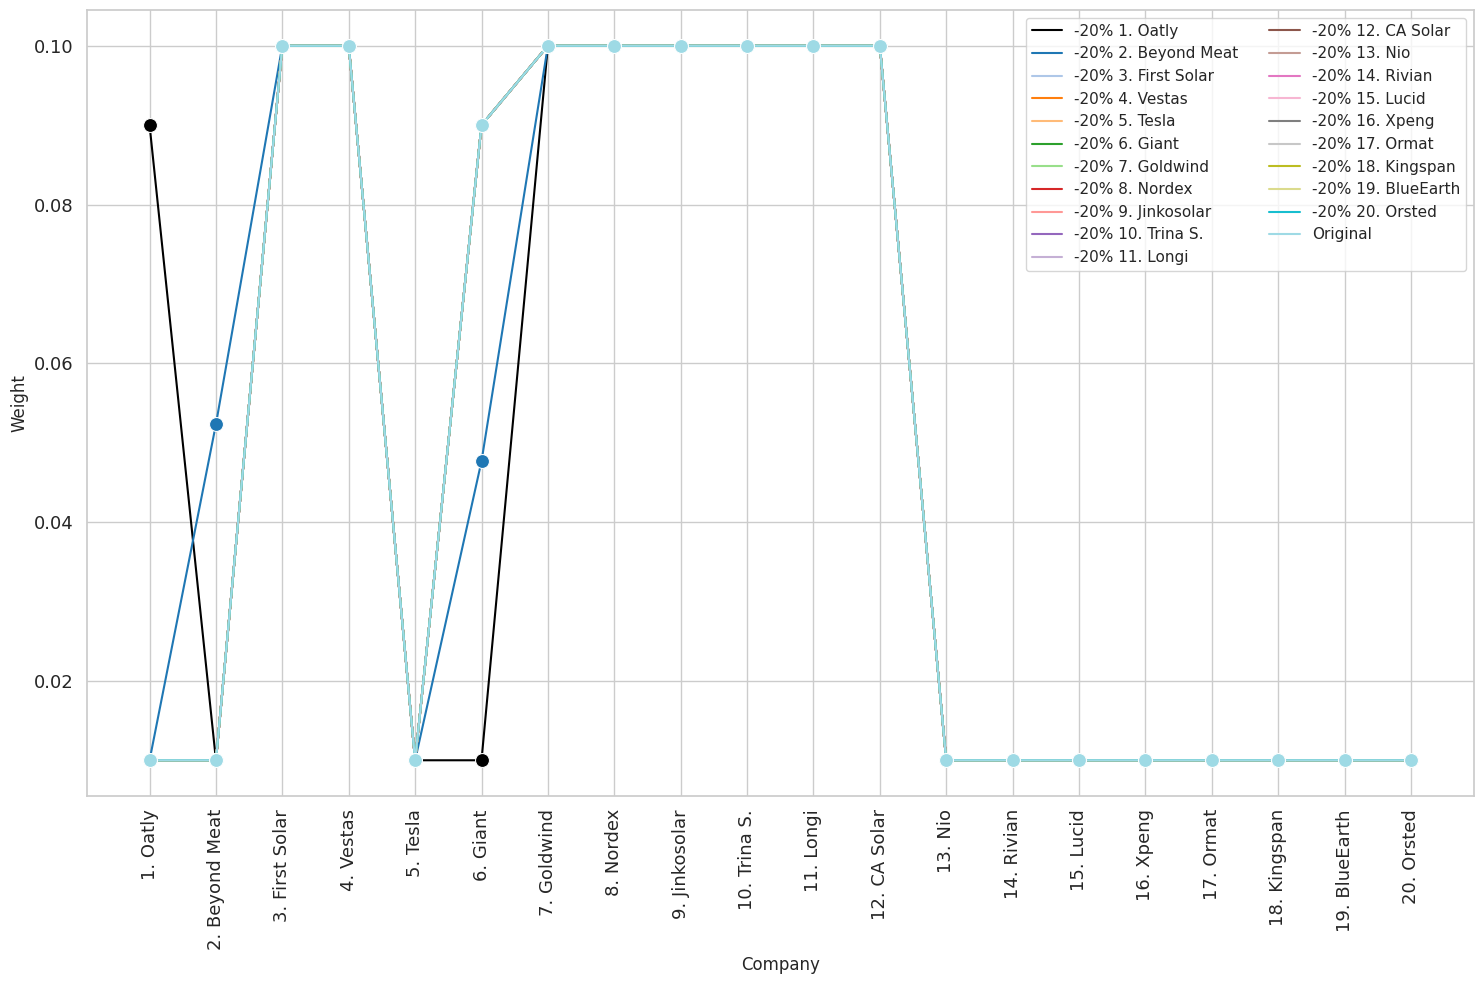

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given data and functions
company_cerj = {
    "1. Oatly": 52,
    "2. Beyond Meat": 54,
    "3. First Solar": 15,
    "4. Vestas": 6,
    "5. Tesla": 544,
    "6. Giant": 44,
    "7. Goldwind": 1.63,
    "8. Nordex": 1.54,
    "9. Jinkosolar": 2.43,
    "10. Trina S.": 0.80,
    "11. Longi": 1.65,
    "12. CA Solar": 0.47,
    "13. Nio": 171,
    "14. Rivian": 456,
    "15. Lucid": 1697,
    "16. Xpeng": 154,
    "17. Ormat": 184,
    "18. Kingspan": 84,
    "19. BlueEarth": 87,
    "20. Orsted": 248
}

companies = list(company_cerj.keys())
cerj_values = list(company_cerj.values())

def objective_with_cerj(w, cerj_values):
    return 1.0 / sum([w[i] / cerj_values[i] for i in range(len(w))])

def constraint(w):
    return sum(w) - 1.0

# Perform original optimization
w0 = np.array([0.05] * len(companies))
bounds = [(0.01, 0.10) for _ in range(len(companies))]
constraints = {'type': 'eq', 'fun': constraint}
result = minimize(objective_with_cerj, w0, args=(cerj_values,), method='SLSQP', bounds=bounds, constraints=constraints)
original_optimized_weights = result.x if result.success else None

# Initialize DataFrame for corrected sensitivity analysis for decreased CERj
df_decrease = pd.DataFrame(columns=['Company', 'Scenario', 'Weight'])

# Perform corrected sensitivity analysis for decreased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 0.8
    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        temp_df = pd.DataFrame({
            'Company': companies,
            'Scenario': f'-20% {companies[i]}',
            'Weight': result.x
        })
        df_decrease = pd.concat([df_decrease, temp_df])

# Add the original weights to the dataframe for decreased CERj
if original_optimized_weights is not None:
    temp_df = pd.DataFrame({
        'Company': companies,
        'Scenario': 'Original',
        'Weight': original_optimized_weights
    })
    df_decrease = pd.concat([df_decrease, temp_df])

# Plot using Seaborn for -20% CERj Variations
plt.figure(figsize=(15, 10))
palette = sns.color_palette("tab20", len(df_decrease['Scenario'].unique()) - 1)
palette = ['black'] + palette  # Add black for the 'Original' scenario
sns.lineplot(x='Company', y='Weight', hue='Scenario', data=df_decrease,
             palette=palette, marker='o', markersize=10)
plt.title('')
plt.xticks(rotation=90, fontsize=plt.rcParams['xtick.labelsize'] + 2)  # Updated line
plt.yticks(fontsize=plt.rcParams['ytick.labelsize'] + 2)  # New line
plt.legend(ncol=2, loc='upper right')
plt.tight_layout()
plt.show()
